### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [125]:
c_df = c_df.dropna()

In [126]:
# pre_c_df = c_df.drop(labels=['CustomerID', 'Gender', 'Profession', 'Family Size'], axis=1)
pre_c_df = c_df.drop(labels=['CustomerID'], axis=1)
pre_c_df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [71]:
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

ValueError: could not convert string to float: 'Male'

In [127]:
pre_c_df['Spending Score (1-100)'] = pre_c_df.pop('Spending Score (1-100)')

In [73]:
pre_c_df

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
0,Male,19,15000,Healthcare,1,4,39
1,Male,21,35000,Engineer,3,3,81
2,Female,20,86000,Engineer,1,1,6
3,Female,23,59000,Lawyer,0,2,77
4,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...
1995,Female,71,184387,Artist,8,7,40
1996,Female,91,73158,Doctor,7,7,32
1997,Male,87,90961,Healthcare,9,2,14
1998,Male,77,182109,Executive,7,2,4


In [74]:
pre_c_df['Family Size'].value_counts()

Family Size
2    361
3    311
1    299
4    289
5    258
6    243
7    234
8      4
9      1
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

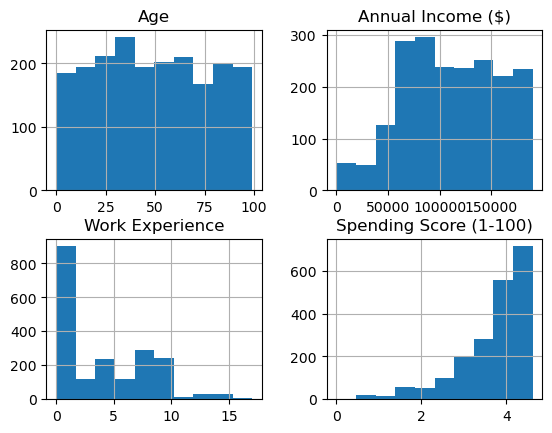

In [36]:
import numpy as np

pre_c_df['Spending Score (1-100)'] = np.log1p(pre_c_df['Spending Score (1-100)'])
pre_c_df.hist()

In [75]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [46]:
get_vif(features)

,vif_score,feature
0,2.886071,Age
1,3.404768,Annual Income ($)
2,1.961348,Work Experience


In [128]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'Profession']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_c_df[column])
    label_encoders[column] = encoder.classes_
    pre_c_df[column] = result

label_encoders

{'Gender': array(['Female', 'Male'], dtype=object),
 'Profession': array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object)}

In [92]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_c_df[['Profession']])

pre_c_df = pd.concat([pre_c_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
pre_c_df

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)","(nan,)"
0,1,19,15000,Healthcare,1,4,39,0,0,0,0,0,1,0,0,0,0
1,1,21,35000,Engineer,3,3,81,0,0,1,0,0,0,0,0,0,0
2,0,20,86000,Engineer,1,1,6,0,0,1,0,0,0,0,0,0,0
3,0,23,59000,Lawyer,0,2,77,0,0,0,0,0,0,0,1,0,0
4,0,31,38000,Entertainment,2,6,40,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,71,184387,Artist,8,7,40,1,0,0,0,0,0,0,0,0,0
1996,0,91,73158,Doctor,7,7,32,0,1,0,0,0,0,0,0,0,0
1997,1,87,90961,Healthcare,9,2,14,0,0,0,0,0,1,0,0,0,0
1998,1,77,182109,Executive,7,2,4,0,0,0,0,1,0,0,0,0,0


In [129]:
# pre_c_df = pre_c_df.drop(labels=['Profession'], axis=1)
pre_c_df.columns = ['Gender', 
                    'Age', 
                    'Annual_Income', 
                    'Profession',
                    'Work_Experience', 
                    'Family_Size', 
                    'Spending_Score', 
                   #  'Artist', 
                   #  'Doctor', 
                   #  'Engineer', 
                   #  'Entertainment',
                   # 'Executive', 
                   #  'Healthcare',
                   # 'Homemaker', 
                   # 'Lawyer', 
                   # 'Marketing', 
                   # 'nan', 
                   ]

pre_c_df

,Gender,Age,Annual_Income,Profession,Work_Experience,Family_Size,Spending_Score
0,1,19,15000,5,1,4,39
1,1,21,35000,2,3,3,81
2,0,20,86000,2,1,1,6
3,0,23,59000,7,0,2,77
4,0,31,38000,3,2,6,40
...,...,...,...,...,...,...,...
1995,0,71,184387,0,8,7,40
1996,0,91,73158,1,7,7,32
1997,1,87,90961,5,9,2,14
1998,1,77,182109,4,7,2,4


In [95]:
pre_c_df = pre_c_df[pre_c_df['nan'] != 1]
pre_c_df = pre_c_df.drop(labels=['nan'], axis=1)
pre_c_df['Spending_Score'] = pre_c_df.pop('Spending_Score')
pre_c_df

,Gender,Age,Annual_Income,Work_Experience,Family_Size,Spending_Score,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,19,15000,1,4,39,0,0,0,0,0,1,0,0,0
1,1,21,35000,3,3,81,0,0,1,0,0,0,0,0,0
2,0,20,86000,1,1,6,0,0,1,0,0,0,0,0,0
3,0,23,59000,0,2,77,0,0,0,0,0,0,0,1,0
4,0,31,38000,2,6,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,71,184387,8,7,40,1,0,0,0,0,0,0,0,0
1996,0,91,73158,7,7,32,0,1,0,0,0,0,0,0,0
1997,1,87,90961,9,2,14,0,0,0,0,0,1,0,0,0
1998,1,77,182109,7,2,4,0,0,0,0,1,0,0,0,0


In [130]:
pre_c_df.corr()['Spending_Score'].sort_values(ascending=False)[1:]

Annual_Income      0.026716
Family_Size        0.005859
Gender             0.003703
Work_Experience   -0.025587
Age               -0.037387
Profession        -0.046437
Name: Spending_Score, dtype: float64

In [131]:
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Spending_Score   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              818.9
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:14:14   Log-Likelihood:                         -9541.8
No. Observations:                1965   AIC:                                  1.910e+04
Df Residuals:                    1959   BIC:                                  1.913e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [133]:
get_vif(features)

,vif_score,feature
0,1.613395,Gender
1,3.231429,Age
2,4.849631,Annual_Income
3,2.069247,Profession
4,2.000652,Work_Experience
5,3.891686,Family_Size


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [135]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [136]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 3.8623, RMSE: 1.9653, MSLE: 0.2086, RMSLE: 0.4567, R2: 0.0059


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>],
       [<Axes: title={'center': 'Profession'}>,
        <Axes: title={'center': 'Work_Experience'}>,
        <Axes: title={'center': 'Family_Size'}>],
       [<Axes: title={'center': 'Spending_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

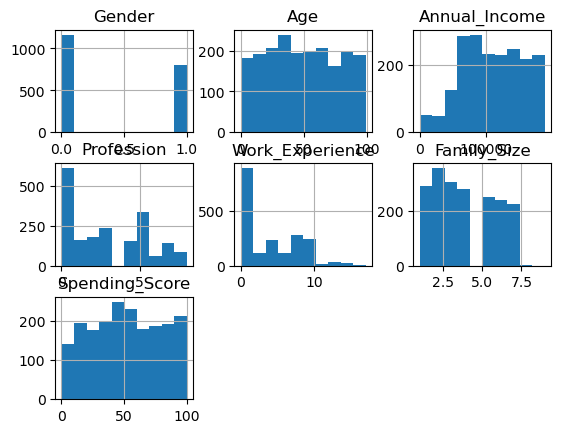

In [137]:
pre_c_df.hist()

In [1]:
pre_c_df['Spending_Score'].value_counts()

NameError: name 'pre_c_df' is not defined

In [3]:
from sklearn.preprocessing import PowerTransformer

# box-cox : 양수만 가능
# yeo-johnson : 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(c_df[['Spending Score (1-100)']])
c_df[['Spending Score (1-100)']] = result
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,-0.347541,Healthcare,1,4
1,2,Male,21,35000,1.046767,Engineer,3,3
2,3,Female,20,86000,-1.762984,Engineer,1,1
3,4,Female,23,59000,0.923214,Lawyer,0,2
4,5,Female,31,38000,-0.311094,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,-0.311094,Artist,8,7
1996,1997,Female,91,73158,-0.609316,Doctor,7,7
1997,1998,Male,87,90961,-1.359906,Healthcare,9,2
1998,1999,Male,77,182109,-1.879105,Executive,7,2
